In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
sales_train = pd.read_csv('data/sales_train.csv')
sales_train['date'] = pd.to_datetime(sales_train['date'].str.split('.', expand=True).rename(columns={0:'day', 1:'month', 2:'year'}))
sales_train['revenue'] = sales_train['item_price'] * sales_train['item_cnt_day']
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [42]:
sales_train[sales_train['date'] == '2013-01-02']

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,2013-01-02,0,59,22154,999.0,1.0,999.0
6,2013-01-02,0,25,2565,549.0,1.0,549.0
28,2013-01-02,0,25,2546,299.0,1.0,299.0
33,2013-01-02,0,25,2715,899.0,1.0,899.0
35,2013-01-02,0,25,2716,149.0,1.0,149.0
...,...,...,...,...,...,...,...
115614,2013-01-02,0,46,1420,349.0,1.0,349.0
115616,2013-01-02,0,45,22014,399.0,1.0,399.0
115621,2013-01-02,0,46,1418,349.0,1.0,349.0
115653,2013-01-02,0,45,22092,109.0,1.0,109.0


In [72]:
daily_revenue_by_shop_by_date.median(axis = 1)

date
2013-01-01     57742.0
2013-01-02    110435.0
2013-01-03    109465.0
2013-01-04     97810.0
2013-01-05     92861.0
                ...   
2015-10-27     46221.0
2015-10-28     26392.0
2015-10-29     27289.0
2015-10-30     46102.0
2015-10-31     67853.5
Length: 1034, dtype: float64

In [147]:
print(sales_train.groupby(['day_of_week','shop_id','date'])['revenue'].sum().unstack().mean(axis=1).unstack().std(axis=1))
sales_train.groupby(['day_of_week','shop_id','date'])['revenue'].sum().unstack().mean(axis=1).unstack().mean(axis=1)

day_of_week
0     35721.474095
1     47553.483383
2     41588.528142
3     75365.481108
4    199322.398214
5    275718.537375
6    249662.098960
dtype: float64


day_of_week
0     48802.541705
1     63245.219946
2     56385.040518
3     69011.920324
4    107862.248982
5    136630.956261
6    114018.933887
dtype: float64

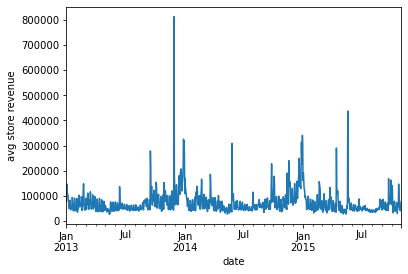

In [73]:
daily_revenue_by_shop_by_date = sales_train.groupby(['date','shop_id'])['revenue'].sum().unstack()
daily_revenue_by_date_mean_shop = daily_revenue_by_shop_by_date.mean(axis = 1)
daily_revenue_by_date_med_shop = daily_revenue_by_shop_by_date.median(axis = 1)
daily_revenue_by_date_mean_shop.plot()
plt.ylabel('avg store revenue');

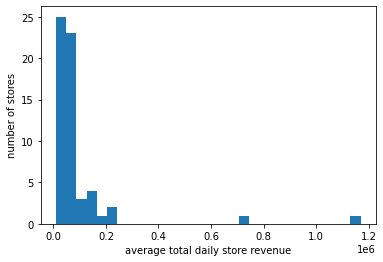

In [58]:
daily_revenue_by_shop = daily_revenue_by_shop_by_date.mean(axis = 0)
daily_revenue_by_shop.plot(kind='hist', bins = 30)
plt.xlabel('average total daily store revenue')
plt.ylabel('number of stores')
plt.show()

In [74]:
daily_revenue_by_shop_by_date['avg_shop'] = daily_revenue_by_date_mean_shop
daily_revenue_by_shop_by_date['med_shop']  = daily_revenue_by_date_med_shop
daily_revenue_by_shop_by_date.head()

shop_id,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,avg_shop,med_shop
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,31886.0,NaN,NaN,NaN,NaN,59993.0,44516.0,NaN,...,NaN,NaN,316557.0,NaN,NaN,NaN,NaN,NaN,80173.058824,55491.0
2013-01-02,NaN,NaN,75023.8,37305.0,121572.0,NaN,146819.0,147332.0,97050.0,NaN,...,69886.0,105339.0,519336.0,NaN,225158.0,NaN,NaN,143931.0,146841.756829,105339.0
2013-01-03,110588.0,108409.0,110521.0,58891.0,101108.0,NaN,128532.0,124552.0,73278.0,NaN,...,76037.0,76654.5,375070.0,NaN,168691.0,NaN,NaN,155045.0,120810.669111,108409.0
2013-01-04,231122.0,45079.0,62854.0,23231.0,88356.0,NaN,121015.0,90173.0,80960.0,NaN,...,72385.0,97633.0,284419.0,NaN,101474.0,NaN,NaN,84128.0,108083.272727,97721.5
2013-01-05,167500.0,103025.0,50181.0,21771.0,52292.0,NaN,107611.0,101877.0,61110.0,NaN,...,28667.0,92861.0,400557.0,NaN,93415.0,NaN,NaN,103285.0,104255.250000,90184.0


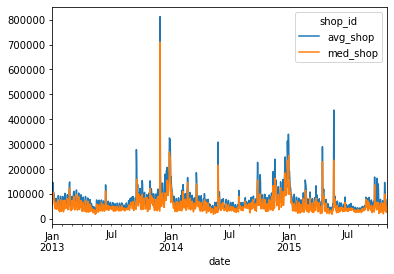

In [75]:
daily_revenue_by_shop_by_date[['avg_shop', 'med_shop']].plot()

In [82]:
daily_revenue_by_shop_by_date.head()
daily_revenue_by_shop_by_date['med_shop_med_date'] = daily_revenue_by_shop_by_date['med_shop'].median()
daily_revenue_by_shop_by_date['mean_shop_med_date'] = daily_revenue_by_shop_by_date['avg_shop'].median()
daily_revenue_by_shop_by_date['mean_shop_mean_date'] = daily_revenue_by_shop_by_date['avg_shop'].mean()

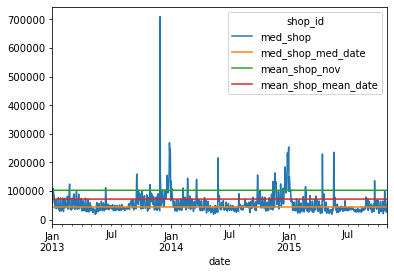

In [105]:
daily_revenue_by_shop_by_date[['med_shop', 'med_shop_med_date', 'mean_shop_nov', 'mean_shop_mean_date']].plot()

In [63]:
daily_revenue_by_shop.sort_values()

shop_id
13    1.026696e+04
40    1.293249e+04
11    1.863054e+04
34    1.878079e+04
10    1.939089e+04
51    2.425367e+04
36    2.697957e+04
8     2.796855e+04
3     2.931990e+04
33    2.959752e+04
39    2.975804e+04
49    2.992708e+04
32    3.154549e+04
44    3.317559e+04
5     3.831368e+04
45    3.977143e+04
4     4.013827e+04
2     4.327077e+04
52    4.369956e+04
59    4.382420e+04
37    4.480963e+04
41    4.483754e+04
14    4.609199e+04
17    4.709313e+04
23    4.804719e+04
48    5.029784e+04
55    5.447709e+04
53    5.481187e+04
16    5.609032e+04
56    5.689894e+04
1     5.782512e+04
22    5.862162e+04
30    6.002887e+04
21    6.069970e+04
19    6.300089e+04
38    6.360390e+04
29    6.462873e+04
7     6.475596e+04
26    6.551997e+04
15    6.651536e+04
35    6.796203e+04
24    6.799574e+04
58    7.182614e+04
46    7.188887e+04
47    7.270106e+04
50    7.560679e+04
18    8.127944e+04
43    8.306769e+04
6     9.511877e+04
57    1.162549e+05
0     1.164451e+05
12    1.358415e+05
42  

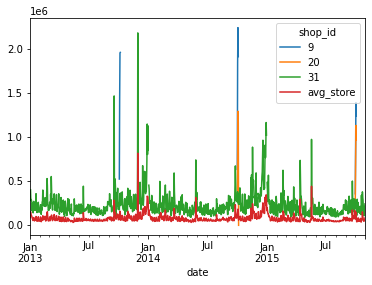

In [71]:
daily_revenue_by_shop_by_date[[9, 20, 31, 'avg_store']].plot()

In [95]:
daily_revenue_by_shop_by_date[daily_revenue_by_shop_by_date.index.month == 11][['avg_shop']].describe()

shop_id,avg_shop
count,60.000000
mean,102586.785205
std,101971.087840
min,42461.800000
25%,57276.101011
50%,82034.915482
75%,106873.071250
max,812106.844445


In [97]:
daily_revenue_by_shop_by_date['month'] = daily_revenue_by_shop_by_date.index.month.values

In [104]:
daily_revenue_by_shop_by_date['mean_shop_nov'] = daily_revenue_by_shop_by_date[daily_revenue_by_shop_by_date['month']==11]['avg_shop'].mean()

In [ ]:
daily_revenue_by_

In [32]:
submission  = pd.read_csv('sa')

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [5]:
test = pd.read_csv('data/test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [107]:
test_shops = test['shop_id'].unique()

In [108]:
test_items = test['item_id'].unique()

baseline model: find average monthly sales of each item in a 30 day window, and then incorporate seasonality




In [34]:
sales_train.groupby(['shop_id', 'item_id'])[['item_cnt_day']].sum()

item_cnt_day
shop_id item_id              
0       30               31.0
        31               11.0
        32               16.0
        33                6.0
        35               15.0
...                       ...
59      22154             1.0
        22155             1.0
        22162            16.0
        22164             6.0
        22167             4.0

[424124 rows x 1 columns]

In [39]:
sales_train.groupby(['shop_id'])[['date']].nunique()

,date
shop_id,
0,57
1,56
2,1018
3,1028
4,1010
5,996
6,1031
7,1034
8,84


In [110]:
len(test_items)

5100

In [112]:
len(test_shops)

42

In [113]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [116]:
sales_train.date.dt.month

0           1
1           1
2           1
3           1
4           1
           ..
2935844    10
2935845    10
2935846    10
2935847    10
2935848    10
Name: date, Length: 2935849, dtype: int64

In [117]:
sales_train['month'] = sales_train.date.dt.month

In [118]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,month
0,2013-01-02,0,59,22154,999.00,1.0,999.00,1
1,2013-01-03,0,25,2552,899.00,1.0,899.00,1
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00,1
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05,1
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,1


In [126]:
(sales_train['date'] - sales_train['date'][0])

0            0 days
1            1 days
2            3 days
3            4 days
4           13 days
             ...   
2935844   1011 days
2935845   1010 days
2935846   1015 days
2935847   1023 days
2935848   1004 days
Name: date, Length: 2935849, dtype: timedelta64[ns]

In [135]:
sales_train['day_of_week'] = sales_train['date'].dt.dayofweek
sales_train['day_of_year'] = sales_train['date'].dt.dayofyear

In [136]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,month,day,day_of_week,day_of_year
0,2013-01-02,0,59,22154,999.00,1.0,999.00,1,2,2,2
1,2013-01-03,0,25,2552,899.00,1.0,899.00,1,3,3,3
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00,1,5,5,5
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05,1,6,6,6
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,1,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,299.00,10,5,5,283
2935845,2015-10-09,33,25,7460,299.00,1.0,299.00,10,4,4,282
2935846,2015-10-14,33,25,7459,349.00,1.0,349.00,10,2,2,287
2935847,2015-10-22,33,25,7440,299.00,1.0,299.00,10,3,3,295


In [161]:
mean_item_prices = sales_train.set_index('date')[['shop_id','item_id','item_price']].groupby(['item_id','shop_id'])['item_price'].mean().reset_index().rename(columns={'item_price':'mean_item_price'})

In [163]:
sales = pd.merge(sales_train, mean_item_prices)

In [166]:
sales['diff_price'] = (sales['item_price'] - sales['mean_item_price'])/sales['mean_item_price']

In [171]:
sales[['shop_id', 'item_id', 'item_price']].groupby(['shop_id', 'item_id'])['item_price'].mean()

shop_id  item_id
0        30         265.000
         31         434.000
         32         221.000
         33         347.000
         35         247.000
                     ...   
59       22154      999.000
         22155      149.000
         22162      389.625
         22164      724.000
         22167      299.000
Name: item_price, Length: 424124, dtype: float64

In [ ]:
sales_train.set_index('date')[['shop_id','item_id','item_price']].groupby(['item_id','shop_id'])['item_price'].mean()

In [134]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,month,day
0,2013-01-02,0,59,22154,999.00,1.0,999.00,1,2
1,2013-01-03,0,25,2552,899.00,1.0,899.00,1,3
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00,1,5
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05,1,6
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,1,1


In [172]:
sales_train['P(store_sale)'] = 0
sales_train['P(item_sale)'] = 0

In [173]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,month,day,day_of_week,day_of_year,P(store_sale),P(item_sale)
0,2013-01-02,0,59,22154,999.00,1.0,999.00,1,2,2,2,0,0
1,2013-01-03,0,25,2552,899.00,1.0,899.00,1,3,3,3,0,0
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00,1,5,5,5,0,0
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05,1,6,6,6,0,0
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,1,1,1,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,299.00,10,5,5,283,0,0
2935845,2015-10-09,33,25,7460,299.00,1.0,299.00,10,4,4,282,0,0
2935846,2015-10-14,33,25,7459,349.00,1.0,349.00,10,2,2,287,0,0
2935847,2015-10-22,33,25,7440,299.00,1.0,299.00,10,3,3,295,0,0


In [178]:
sales_train.groupby(['date','item_id', 'shop_id'])['item_cnt_day'].sum().unstack().mean(axis=1).unstack().fillna(0).mean()

item_id
0        0.000967
1        0.005803
2        0.001934
3        0.001934
4        0.000967
           ...   
22165    0.001934
22166    0.336557
22167    0.651444
22168    0.005803
22169    0.000967
Length: 21807, dtype: float64

In [179]:
#careful!  We might just not have data for a given shop on a given day (which is different than 0 net sales!!!!)
avg_daily_sales_by_item = sales_train.groupby(['date','item_id', 'shop_id'])['item_cnt_day'].sum().unstack().mean(axis=1).unstack().fillna(0).mean()

In [202]:
total_item_cnt_day_by_date_by_shop = sales_train.groupby(['date','item_id', 'shop_id'])['item_cnt_day'].sum().unstack().notna().sum(level=[0]).stack().reset_index().rename(columns={0:'total_items_sold'})
total_item_cnt_day_by_date_by_shop['shop_open'] = np.where(total_item_cnt_day_by_date_by_shop['total_items_sold']>0, 1, 0)

In [204]:
shop_open = total_item_cnt_day_by_date_by_shop.drop(columns=['total_items_sold'])
shop_open

,date,shop_id,shop_open
0,2013-01-01,0,0
1,2013-01-01,1,0
2,2013-01-01,2,1
3,2013-01-01,3,0
4,2013-01-01,4,0
...,...,...,...
62035,2015-10-31,55,1
62036,2015-10-31,56,1
62037,2015-10-31,57,1
62038,2015-10-31,58,1


In [185]:
pd.DataFrame(avg_daily_sales_by_item).reset_index().rename(columns={0:'avg_item_cnt_day'})

,item_id,avg_item_cnt_day
0,0,0.000967
1,1,0.005803
2,2,0.001934
3,3,0.001934
4,4,0.000967
...,...,...
21802,22165,0.001934
21803,22166,0.336557
21804,22167,0.651444
21805,22168,0.005803


In [187]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,month,day,day_of_week,day_of_year,mean_item_price,diff_price
0,2013-01-02,0,59,22154,999.00,1.0,999.00,1,2,2,2,999.00,0.000000
1,2013-01-03,0,25,2552,899.00,1.0,899.00,1,3,3,3,899.00,0.000000
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00,1,5,5,5,899.00,0.000000
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05,1,6,6,6,1709.05,0.000000
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,1,1,1,15,1104.00,-0.004529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-22,33,25,7327,349.00,1.0,349.00,10,3,3,295,349.00,0.000000
2935845,2015-10-24,33,25,7315,399.00,1.0,399.00,10,5,5,297,399.00,0.000000
2935846,2015-10-31,33,25,7409,299.00,1.0,299.00,10,5,5,304,299.00,0.000000
2935847,2015-10-09,33,25,7409,299.00,1.0,299.00,10,4,4,282,299.00,0.000000


In [189]:
sales = pd.merge(sales, pd.DataFrame(avg_daily_sales_by_item).reset_index().rename(columns={0:'avg_item_cnt_day'}))
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,month,day,day_of_week,day_of_year,mean_item_price,diff_price,avg_item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0,999.0,1,2,2,2,999.0,0.000000,0.046422
1,2013-01-23,0,24,22154,999.0,1.0,999.0,1,2,2,23,649.0,0.539291,0.046422
2,2015-10-10,33,24,22154,299.0,1.0,299.0,10,5,5,283,649.0,-0.539291,0.046422
3,2013-01-20,0,27,22154,999.0,1.0,999.0,1,6,6,20,649.0,0.539291,0.046422
4,2015-07-12,30,27,22154,299.0,1.0,299.0,7,6,6,193,649.0,-0.539291,0.046422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-17,33,25,8428,249.0,1.0,249.0,10,5,5,290,249.0,0.000000,0.000967
2935845,2015-10-01,33,25,7903,12198.0,1.0,12198.0,10,3,3,274,12198.0,0.000000,0.000967
2935846,2015-10-29,33,25,7610,2890.0,1.0,2890.0,10,3,3,302,2890.0,0.000000,0.000967
2935847,2015-10-22,33,25,7635,2100.0,1.0,2100.0,10,3,3,295,2100.0,0.000000,0.000967


In [190]:
daily_revenue_by_shop_by_date

shop_id,0,1,2,3,4,5,6,7,8,9,...,57,58,59,avg_shop,med_shop,med_shop_med_date,mean_shop_med_date,mean_shop_mean_date,month,mean_shop_nov
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,31886.0,NaN,NaN,NaN,NaN,59993.0,44516.0,NaN,...,NaN,NaN,NaN,80173.058824,55491.0,44096.5,57630.3016,71715.64116,1,102586.785205
2013-01-02,NaN,NaN,75023.8,37305.0,121572.0,NaN,146819.0,147332.0,97050.0,NaN,...,NaN,NaN,143931.0,146841.756829,105339.0,44096.5,57630.3016,71715.64116,1,102586.785205
2013-01-03,110588.0,108409.0,110521.0,58891.0,101108.0,NaN,128532.0,124552.0,73278.0,NaN,...,NaN,NaN,155045.0,120810.669111,108409.0,44096.5,57630.3016,71715.64116,1,102586.785205
2013-01-04,231122.0,45079.0,62854.0,23231.0,88356.0,NaN,121015.0,90173.0,80960.0,NaN,...,NaN,NaN,84128.0,108083.272727,97721.5,44096.5,57630.3016,71715.64116,1,102586.785205
2013-01-05,167500.0,103025.0,50181.0,21771.0,52292.0,NaN,107611.0,101877.0,61110.0,NaN,...,NaN,NaN,103285.0,104255.250000,90184.0,44096.5,57630.3016,71715.64116,1,102586.785205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-27,NaN,NaN,7822.0,26808.0,18728.0,17955.0,82989.0,26457.0,NaN,NaN,...,84759.0,79933.0,32313.0,53836.741190,44493.0,44096.5,57630.3016,71715.64116,10,102586.785205
2015-10-28,NaN,NaN,18238.0,13497.0,22458.0,15732.0,41674.0,33288.0,NaN,NaN,...,76346.0,26890.0,40210.0,41003.573810,26352.5,44096.5,57630.3016,71715.64116,10,102586.785205
2015-10-29,NaN,NaN,40685.0,22784.0,16553.0,23880.0,49688.0,25034.0,NaN,NaN,...,75966.0,31488.0,17027.0,44276.503333,26161.5,44096.5,57630.3016,71715.64116,10,102586.785205
